# Drift Diffusion Models

## Introduction

There is an old philosophical thought experiment that illustrates indecision: a donkey placed equidistant between two piles of hay will starve to death because it cannot choose between them ([Budiran's Ass](https://en.wikipedia.org/wiki/Buridan%27s_ass)). This scenario, while hypothetical, highlights the importance of decision-making mechanisms. A computational model of this behavior could even be demonstrated using a simple tree stump to represent the donkey. Notably, if the donkey’s decision-making process incorporated some degree of noise or randomness, it would ultimately have chosen a pile and survived. Real-world decisions are rarely so static; they are complex, dynamic processes that evolve over time, offering far more intriguing opportunities for modeling than a scenario of perpetual indecision.

How many decisions do you make each day? Depending on your perspective and the criteria for defining a decision, the number could range from hundreds to thousands. How about a squirrel? Likely, a squirrel makes even more decisions—being in constant motion as it forages, evades predators, and navigates the four fundamental drivers of survival: feeding, fighting, fleeing, and reproduction. Like humans, animals continuously make decisions throughout their waking lives, evaluating evidence across multiple dimensions and timescales. Although human decision-making often involves reason and the capacity to consider vastly more dimensions and extended timescales, studying simpler decision-making processes provides an essential starting point. Interestingly, many of our simpler decisions might rely on the same neural mechanisms that evolved in our near and distant ancestors.

### Why are drift diffusion models useful?

Decisions typically involve two or more options, one of which is correct or better than the others.  Decision making performance can be quantified in terms of accuracy (how often the correct or best option chosen) as well as speed (how long it takes to decide).  Accuracy and speed are typically at odds -- deciding faster means making more errors (a "speed/accuracy tradeoff" explored in this lab).  We can evaluate decision making in terms of speed, accuracy, and reward.

Drift diffusion models use mathematics originally developed in physics.  You start with a particle of gas in a confined space that jitters from Brownian motion (noise), then add a direction of motion to the air surrounding the particle (drift rate), and explore the time course of how the particle moves and when it is statistically likely to move a particular distance (cross a threshold).  The same parameters can be mapped onto key elements of decision making, replacing the particle with an undecided state, e.g. equidistant between two decision options (thresholds), the motion of air instead becomes the accumulation of evidence moving toward either of the options, and crossing a threshold is making a decision.  These simple parameters allow us to explore decision making speed and accuracy in considerable detail.  For example, we can define the optimal balance between speed and accuracy to maximize reward.  With optimality operationalized it is then possible to evaluate behavioral performance in terms of distance from optimal (the closer to optimal the better, of course).       

The required readings for this week are especially informative and relevant. Here's the link to Bogacz et al.: https://sites.engineering.ucsb.edu/~moehlis/moehlis_papers/psych.pdf

As Bogacz et al. (2006, see [additional resources](../intro.md#additional-resources)) explain,

"It has been known since Hernstein’s (1961, 1997) work that animals do not achieve optimality under all conditions, and in behavioral economics, humans often fail to choose optimally (e.g., Kahneman & Tversky, 1984; Loewenstein & Thaler, 1989). For example, in selecting among two items of comparable value and a cash payment worth less than either, participants often opt for cash, possibly to avoid a harder decision between two more valuable but similar items (Shafir & Tversky, 1995). **Such findings raise important questions: Is human decision making always suboptimal?** If it is not, under what conditions is it optimal? When it is suboptimal, does this reflect inherent deficiencies in decision-making mechanisms or other sources of systematic bias? Answers to such questions may provide insights into underlying neural mechanisms. However, to consider them, one must first describe optimal performance, against which actual behavior can be compared."

## Code Examples

### Installation and Setup

In [ ]:
%%capture
!pip install psyneulink

In [2]:
import matplotlib.pyplot as plt
import psyneulink as pnl
import numpy as np
import pandas as pd

### The Two Alternative Forced Choice (2AFC / TAFC) Task

The simplest form of decision making involves only two options (A OR B, deliberately excluding options of neither nor both). We refer to this scenario as the *Two Alternative Forced Choice* (2AFC / TAFC) Task. Some survival-relevant examples of 2AFC are explore vs. exploit, and fight vs. flight. A common lab 2AFC task involves lots of dots moving on a screen (Random dot kinematogram, RDK). Some are moving leftward and some are moving rightward. The participant's task on each trial is to determine which direction has more motion, LEFT or RIGHT. The experimenter can manipulate the amount of evidence available: 51% left / 49% right is difficult, while 99% left / 1% right is very easy. It is a good experiment for manipulating task difficulty and measuring performance. Experimenters can also vary the reward rate for correct trials (and/or penalty rate for incorrect trials) and the time delay between trials. All of these experimental parameters can be accounted for in a drift diffusion model.      

Drift diffusion models (DDMs) allow you to simulate behavioral performance on a 2AFC task -- adjusting the parameters can produce data that are more-or-less indistinguishable from human performance on a variety of 2AFC tasks. Below is a simple diagram of how the DDM works. Imagine, a human has to respond to a RDK showing most a dots moving to the left. They have to make a decision between "left" (correct response) "right" (wrong response). In this example, the human sees the stimulus (*stimulus onset*), and then takes some time to process that visual information. Basic visual processing at the start of a trial and motor response processing at the end of a trial (as opposed to decision-relevant processing) is grouped together and called *non-decision time* (all depicted at the start of the trial in the diagram below). Once the stimulus is perceived, the agent accumulates evidence about the stimulus until it reaches a *threshold* and is sufficiently confident to choose decision 1 or decision 2. Overall the evidence drifts towards one or the other decision (in this example, typically to the correct response) with a specific *drift rate* that is dependent on the task difficulty (easier tasks have higher drift rates). In addition, this is a noisy process that unfolds over time so there is some variability in how long it takes the agent to accumulate sufficient evidence to make decisions.

![Drift Diffusion Model](https://younesstrittmatter.github.io/502B/_static/images/ddm.png)

### To err on the side of caution or respond quickly?

How do you know how quickly to respond? Bogacz et al. (2006) state,

"The DDM is optimal in the sense that it is the fastest decision maker for a given level of accuracy. This assumes a fixed decision threshold, yet the model does not specify what this should be. Absent noise, thresholds have no effect on accuracy. However, with noisy data, accuracy increases as thresholds and decision times (DTs) rise because there is more time to average out uncorrelated noise. This produces a speed–accuracy trade-off: Lower thresholds produce faster but less accurate responding, whereas higher thresholds produce more accurate but slower responses. This speed–accuracy trade-off is critical for interpreting the results of most psychological experiments (Pachella, 1974; Wickelgren, 1977). For example, a manipulation intended to influence task difficulty, and thereby accuracy, could instead simply induce a change in response threshold, thereby changing RTs."

### Exercise 1

In your own words, define the following terms:

1. Decision threshold
2. The speed/accuracy tradeoff
3. Is this correct: The higher the decision threshold, the faster the decision is made?
4. Is this correct: The higher the decision threshold, the more accurate the decision is?

<details><summary><b>Solution</b></summary>

1. The decision threshold is the amount of evidence that must be accumulated before a decision is made. If the evidence reaches the threshold for decision 1, the agent will choose decision 1. If the evidence reaches the threshold for decision 2, the agent will choose decision 2. The decision threshold is a parameter that can be manipulated through factors like the reward for being accurate on any given trial.
2. The speed/accuracy tradeoff is the relationship between how quickly a decision is made and how accurate that decision is. In general, the faster a decision is made, the less accurate it is. Conversely, the more accurate a decision is, the longer it takes to make that decision. The speed/accuracy tradeoff is a fundamental aspect of decision-making that can be manipulated through the decision threshold parameter in the drift diffusion model.
3. No, this is not correct. The higher the decision threshold, the slower the decision is made. This is because more evidence must be accumulated before a decision is made. Conversely, the lower the decision threshold, the faster the decision is made. This is because less evidence must be accumulated before a decision is made.
4. Yes, this is correct. The higher the decision threshold, the more accurate the decision is. This is because more evidence must be accumulated before a decision is made, which means that the agent is more confident in their decision. Conversely, the lower the decision threshold, the less accurate the decision is. This is because less evidence must be accumulated before a decision is made, which means that the agent is less confident in their decision.

</details>

As Bogacz et al. (2006) explain, 
    
"..the TAFC and DDM have played important roles in human history: "In applying the DDM to the TAFC, we assume that the difference in the (noisy) information favoring each alternative is integrated over each trial and that a decision is reached when the resulting accumulated value crosses a critical threshold. Discrete analogues of the DDM were first applied to decision making in World War II, via the sequential probability ratio test (SPRT), the theory being developed independently by Barnard (1946) and Wald (1947; cf. Lehmann, 1959). (For histories, see DeGroot, 1988; Good, 1979; Wallis, 1980.) It was subsequently shown that the DDM and its discrete analogue, a directed random walk, describe accuracy and reaction times (RTs) in humans performing TAFC tasks (Laming, 1968; Ratcliff, 1978; Stone, 1960). In particular, DDM first passages account for a robust feature of human performance: RT distributions are heavily skewed toward longer times."

### Random Walk

A random walk starts at some point (*bias*) and at each time step moves some amount chosen at random - usually the randomness is drawn from a bounded distribution centered around 0. This process is cumulative, and it is possible to move far away from the starting point but if the random distribution is centered around 0 then moving far away typically takes many steps. The following cell generates a random walk. Run the cell multiple times to observe the variety of trajectories that can be generated. Experiment with the parameters—such as the probability, bias, and threshold—to understand how they influence the behavior of the random walk. For example:

- `probability`: Adjust this to control the likelihood of moving in one direction versus the other.
- `bias`: Introduce a bias in the starting point.
- `threshold`: Set the limits at which the random walk stops.

These changes will help you get a better intuition for how random walks behave under different conditions.

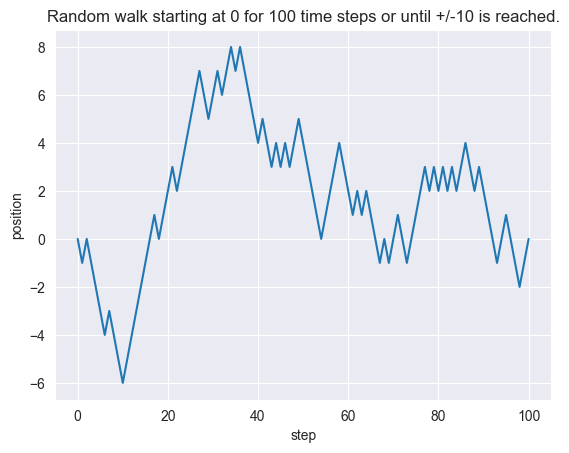

In [10]:
# Defining the probability to move up (probability to move down is 1 - prob)
probability = .5
 
# Defining the starting position 
bias = 0
positions = [bias]

# Defining the maximum number of steps
n_steps = 100

# Defining the threshold of the walk
threshold = 10

# Creating a list of random numbers to decide the direction of the walk
random_list = np.random.random(n_steps)
direction = [1 if i < probability else -1 for i in random_list]
 
# Bounds the walk at +/-threshold
for dr in direction:
    positions.append(positions[-1] + dr)
    if positions[-1] > threshold or positions[-1] < -threshold:
        break
 

# plotting down the graph of the random walk in 1D
plt.plot(positions)
plt.xlabel('step')
plt.ylabel('position')
plt.title(f'Random walk starting at {bias} for {n_steps} time steps or until +/-{threshold} is reached.') 
plt.show()


### Random Walk in the context of DDM
Within a DDM the noise parameter is a random walk - and a higher value of noise means taking bigger steps. When we add a drift rate that adds a non-random motion component, so the drift rate moves the walk in a particular direction. You can think of drift rate as accumulating signal, with noise added on top as a random component.

### Exercise 2

Add a constant drift rate to the above implementation of a random walk and observe how it changes the behavior of the random walk. Experiment with different values of the drift rate and observe how it influences the behavior of the random walk.

In [ ]:
# Defining the probability to move up (probability to move down is 1 - prob)
probability = .5
 
# Defining the starting position 
bias = 0
positions = [bias]

# Defining the maximum number of steps
n_steps = 100

# Defining the threshold of the walk
threshold = 10

# Defining the drift rate (constant drift in one direction)
drift_rate = ...

# Creating a list of random numbers to decide the direction of the walk
random_list = np.random.random(n_steps)
direction = [1 if i < probability else -1 for i in random_list]
 
# Adjust your random walk to include the drift rate
for dr in direction:
    ...
 
# plotting down the graph of the random walk in 1D
plt.plot(positions)
plt.xlabel('step')
plt.ylabel('position')
plt.title(f'Random walk starting at {bias} for {n_steps} time steps or until +/-{threshold} is reached.') 
plt.show()

<details><summary><b>Solution</b></summary>

```python
# Defining the probability to move up (probability to move down is 1 - prob)
probability = .5
 
# Defining the starting position 
bias = 0
positions = [bias]

# Defining the maximum number of steps
n_steps = 100

# Defining the threshold of the walk
threshold = 10

# Defining the drift rate (constant drift in one direction)
drift_rate = .1  # play with this value to see how it influences the behavior of the random walk, also try negative values

# Creating a list of random numbers to decide the direction of the walk
random_list = np.random.random(n_steps)
direction = [1 if i < probability else -1 for i in random_list]
 
# Bounds the walk at +/-threshold
for dr in direction:
    positions.append(positions[-1] + dr + drift_rate)  # add the drift rate to the position
    if positions[-1] > threshold or positions[-1] < -threshold:
        break
 

# plotting down the graph of the random walk in 1D
plt.plot(positions)
plt.xlabel('step')
plt.ylabel('position')
plt.title(f'Random walk starting at {bias} for {n_steps} time steps or until +/-{threshold} is reached.') 
plt.show()
```

</details>

### Drift Diffusion Model in PsyNeuLink